In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
# data를 index_col으로 지정
df = pd.read_csv(dataset_filepath, index_col ='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [4]:
ts1 = df['Temp']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

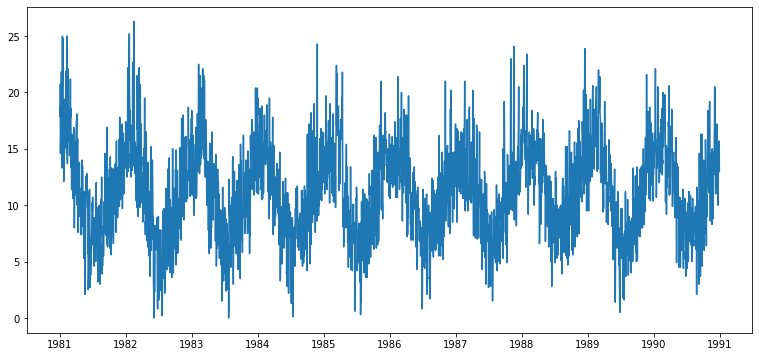

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [6]:
ts1[ts1.isna()]

Series([], Name: Temp, dtype: float64)

Series([], Name: Temp, dtype: float64)


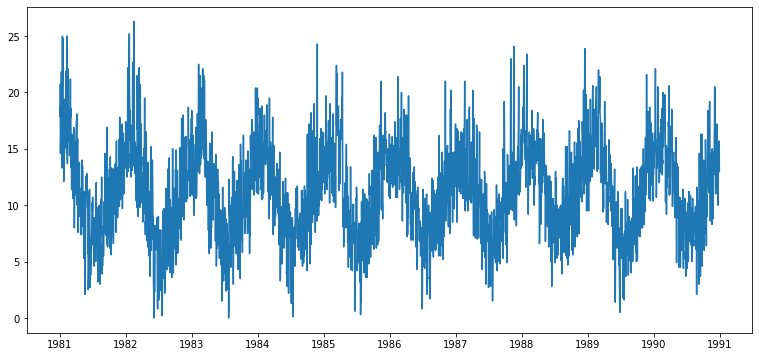

In [7]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

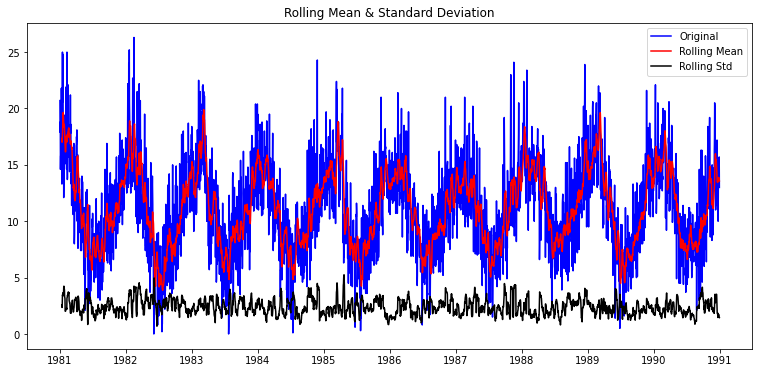

In [9]:
plot_rolling_statistics(ts1, window=12)

* 시각화 결과만 놀고보면 시계열 데이터가 안정적이라고 말할 수도 있겠지만 명확하게 단정 짓기 위해서는 통계적인 접근이 필요

#### 다른 데이터에 대해서도 비교하기

In [10]:
# 월별 항공 승객 수(천면 단위)의 시계열 데이터
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


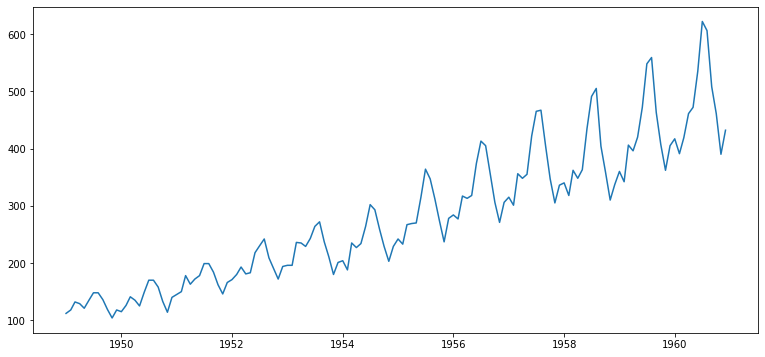

In [11]:
ts2 = df['Passengers']
plt.plot(ts2)

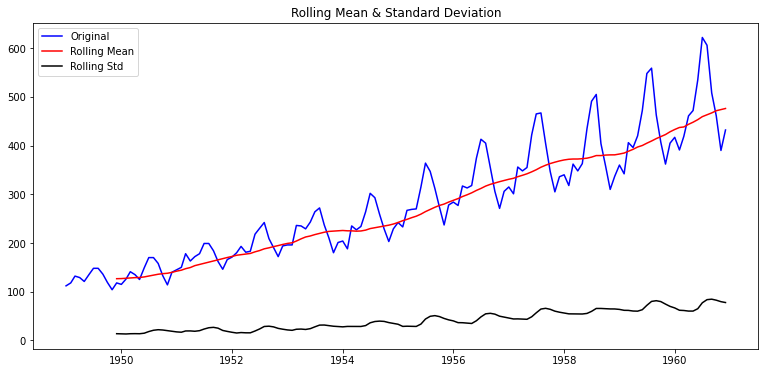

In [12]:
plot_rolling_statistics(ts2, window=12)

* 시간의 추이에 따라 평균과 분산이 증가하는 패턴이라면 이 시계열 데이터는 적어도 안정적이진 않다고 결론을 내릴 수 있음

> 1.주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후,

> 2.통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에

> 3.이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다

>❓ 귀무가설, 대립가설, p-value 이란?

>>우리가 일반적으로 생각하는 가설은 아마 다음과 같을 수 있습니다. “지구는 둥글 것이다." 또는 “태양이 지구를 돌 것이다.” 하지만 통계적 가설 검정은 어떠한 큰 이론을 제안하는 가설이 아닙니다. 통계에서 가설은 우리가 알고 싶어 하는 “어떤 모집단의 모수(예: 평균, 분산, 등)에 대한 잠정적인 주장"입니다. 따라서 통계적 가설은 앞서 예를 든 가설들과는 다르게 일정한 형식을 따라야 합니다.

>>그 형식이 바로 “ 귀무가설(Null hypothesis:H0)” 과 “ 대립가설(Alternative hypothesis:H1)” 입니다. 통계적 가설 검정을 하려면 우선 두 가지 형식적 가설 (귀무가설 과 대립가설)을 설정해야 합니다. 그리고 어떤 가설을 채택을 할지를 확률적으로 따져보고 둘 중 하나를 채택합니다. 그러면 귀무가설은 무엇이고 대립가설은 무엇일까요?

>>귀무 가설은 통계학에서 처음부터 버릴 것을 예상하는 가설이다. 차이가 없거나 의미있는 차이가 없는 경우의 가설이며 이것이 맞거나 맞지 않다는 통계학적 증거를 통해 증명하려는 가설입니다. 쉽게 말하면 “모집단의 모수는 00와 같다.” 또는 “ 모집단의 모수는 00와 차이가 없다.” 라고 가정하는 것을 말합니다. 예를 들면 1) 만약 전국 남학생의 평균 키가 170cm라는 주장을 통계적으로 검정한다면, 이에 대한 귀무 가설은 “전국 남학생의 평균 키는 170cm과 같다.(또는 차이가 없다.)”가 될 것입니다. 2)제약 회사에서 개발한 백신의 효과를 검정한다면, 귀무가설은 “개발한 백신은 효과가 없다.(또는 차이가 없다).” 가 됩니다. 즉 귀무가설은 “~와 차이가 없다.” “~의 효과가 없다.” “~와 같다.” 라는 형식으로 설정된다는 것을 알 수 있습니다.

>>대립가설의 정의는 “귀무가설이 거짓이라면 대안적으로 참이 되는 가설" 입니다. 쉽게 설명하면 “귀무가설이 틀렸다고 판단했을 때(기각되었을 때), 대안적으로 선택하는(채택되는) 가설"을 말합니다. 다시 예로 설명드리면 대립가설은 “모집단의 모수는 00와 다르다.” 또는 “ 모집단의 모수는 00와 차이가 있다.” 라고 가정하는 것을 말합니다. 예를 들면 1) 만약 전국 남학생의 평균 키가 170cm라는 주장을 통계적으로 검정한다면, 이에 대한 대립 가설은 “전국 남학생의 평균 키는 170cm와 다르다.(또는 차이가 있다.)”가 될 것이고, 2)제약 회사에서 개발한 백신의 효과를 검정한다면, 대립가설은 “개발한 백신은 효과가 있다.(또는 차이가 있다).” 가 됩니다. 즉 대립가설은 “~와 차이가 있다.” “-의 효과는 있다.” “-와 다르다.” 라는 형식으로 설정된다는 것을 알 수 있습니다.

>>p-value 정의는 “귀무가설이 참이라고 가정했을 때, 표본으로 얻어지는 통계치(예: 표본 평균)가 나타날 확률" 입니다. p값이 낮다는 것은 귀무가설이 참이라는 가정 하에서 표본을 추출했을 때, 이런 표본 평균이 관측될 확률이 낮다는 것을 뜻합니다. 즉 p 값이 매우 낮으면, 이러한 표본 통계량은 우연히 나타나기 어려운 케이스이기 때문에, 우리는 귀무가설을 채택하지 않고(기각하고), 대안적인 가설, 즉 대립가설을 채택하게 됩니다.

#### Statsmodels 패키지와 adfuller 메서드

In [13]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [14]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [15]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### 로그함수 변환

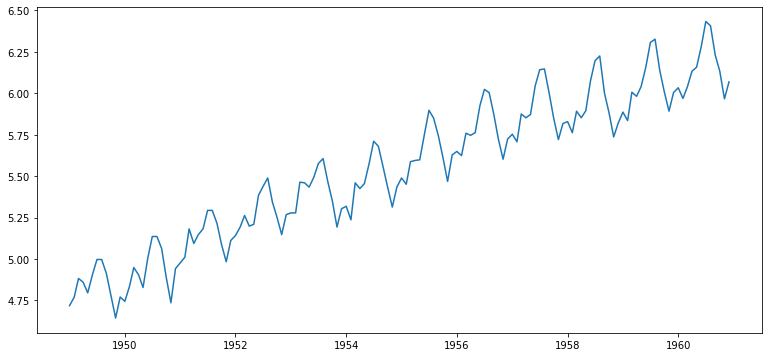

In [16]:
ts_log = np.log(ts2)
plt.plot(ts_log)

 시간 추이에 따라 분산이 점점 커지고 있다

In [17]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


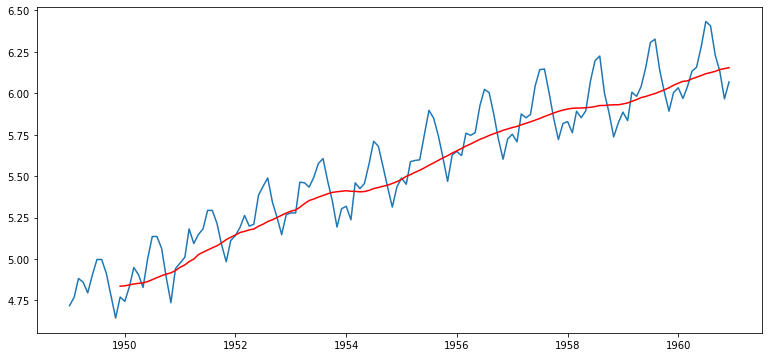

In [18]:
# Moving average 제거 - 추세(Trend) 상쇄하기

moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [20]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

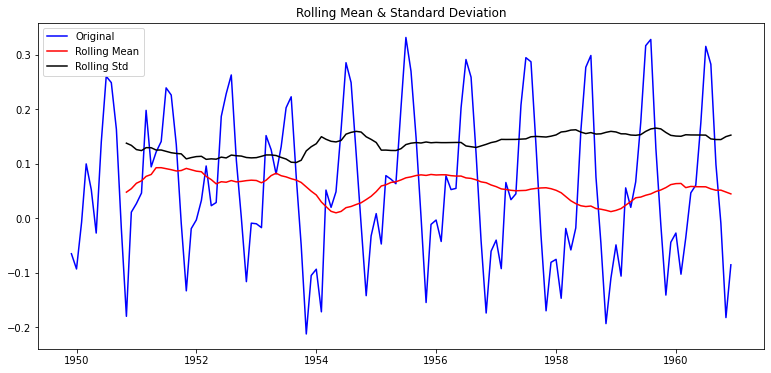

In [21]:
plot_rolling_statistics(ts_log_moving_avg)

In [22]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


 p-value가 0.02 수준이 되었습니다. 95% 이상의 confidence로 이 time series는 stationary하다고 할 수 있음

지금까지의 접근에서 한 가지 숨겨진 문제점이 있습니다.
바로 Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점

In [23]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

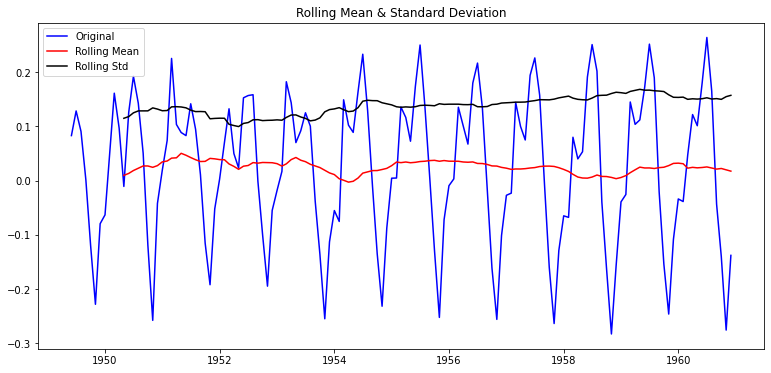

In [24]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [25]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


그래프를 정성적으로 분석해서는 window=12일 때와 별 차이를 느낄 수 없지만 Augmented Dickey-Fuller Test의 결과 p-value는 0.18 수준이어서 아직도 안정적 시계열이라고 말할 수 없게 되었습니다.

이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같습니다만, moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요하다는 것을 기억해 둡시다.

이제 시간의 추이에 따라 평균이 증가하는 trend를 제거하였습니다. 그러나 여전히 안정적인 시계열이라고 하기에는 마음에 걸리는 부분이 있습니다.

### 차분(Differencing) - 계절성(Seasonality) 상쇄하기

Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소입니다. 이것은 Moving Average 제거로는 상쇄되지 않는 효과입니다. 이런 계절적, 주기적 패턴을 계절성(Seasonality)라고 합니다.

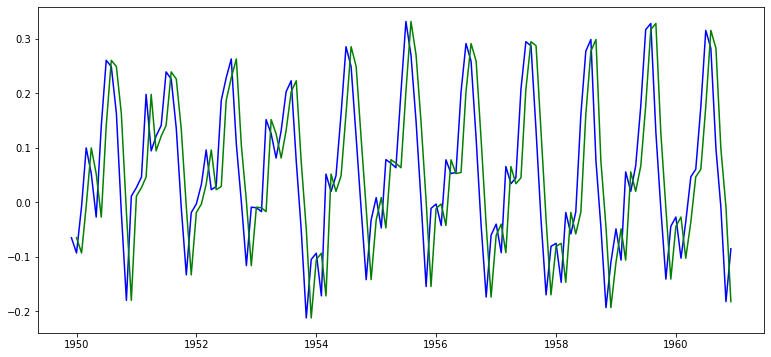

In [26]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

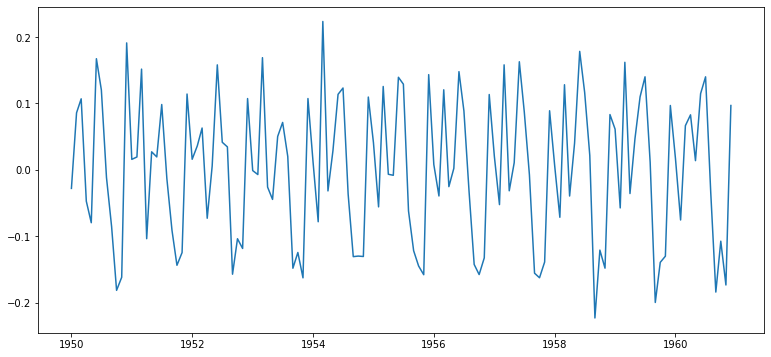

In [27]:
#원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 표현
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

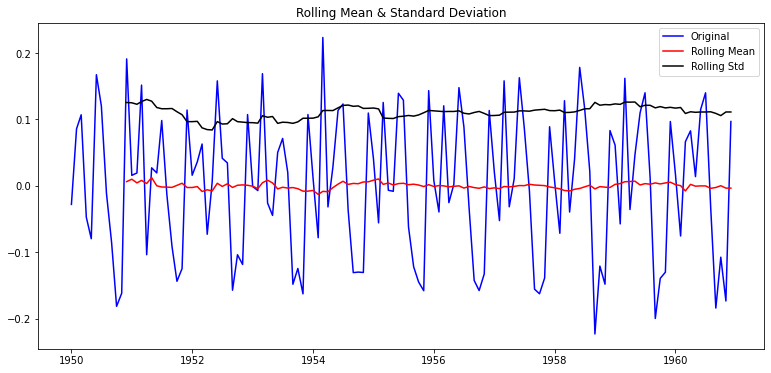

In [28]:
#이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악
plot_rolling_statistics(ts_log_moving_avg_diff)

In [29]:
#차분의 효과가 어떠했는지 알아보기 위해 Augmented Dickey-Fuller Test를 수행
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


이동평균을 빼 주어 추세(Trend)를 제거하고 난 시계열에다가 1차 차분(1st order differencing)을 적용하여 Seasonality 효과를 다소 상쇄한 결과, p-value가 약 0.022 에서 0.0019로 1/10 정도로 줄었습니다.

## 시계열 분해(Time series decomposition)

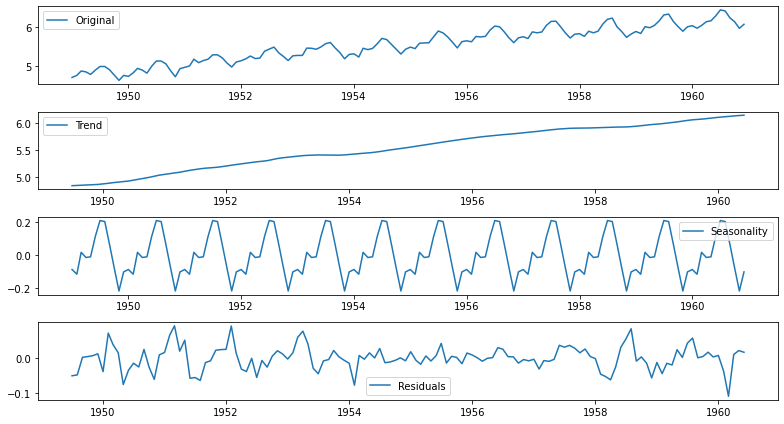

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Original 시계열에서 Trend와 Seasonality를 제거하고 난 나머지를 Residual이라고 합니다. 뒤집어서 말하면 Trend+Seasonality+Residual=Original 이 성립한다는 뜻입니다. 이러한 Decomposing은 시계열 데이터를 이해하는 중요한 관점을 제시

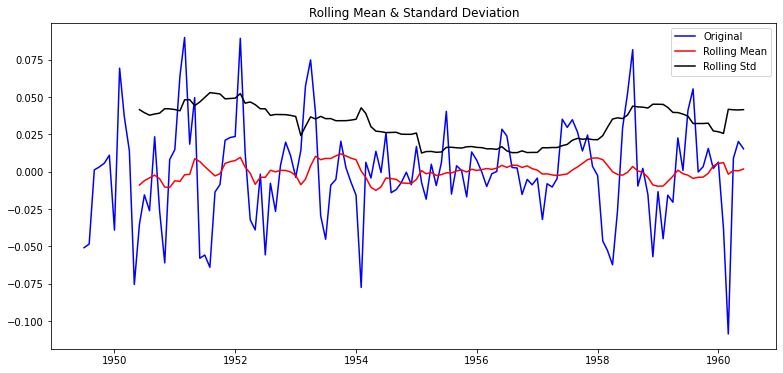

In [31]:
# Residual에 대해 안정성 여부 판단하기
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [32]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


---

## ARIMA 모델

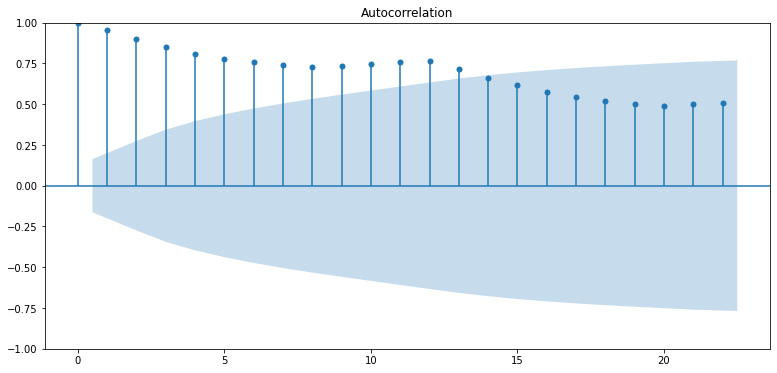

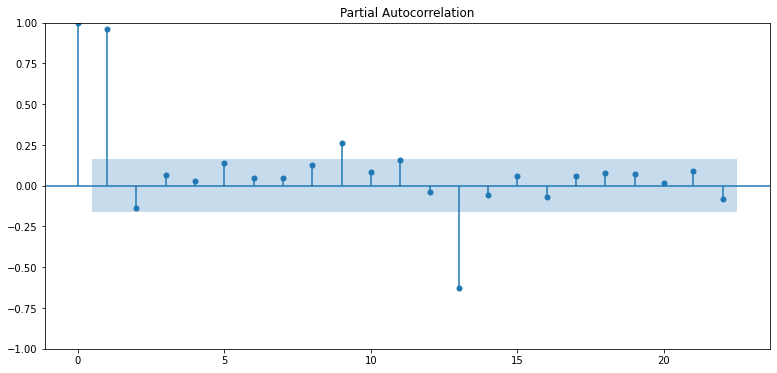

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

아래 그림은 ACF를 통해 MA 모델의 시차 q를 결정하고, PACF를 통해 AR 모델의 시차 p를 결정할 수 있음을 통계학적으로 설명하는 아티클에서 요약 결론 부분만 가져온 것

<img src = " https://d3s0tskafalll9.cloudfront.net/media/images/E-16-4.max-800x600.png" >

이 결론에 따라 보자면 PACF 그래프를 볼 때 p=1이 매우 적합한 것 같습니다. p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문입니다. PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻입니다.
반면 ACF는 점차적으로 감소하고 있어서 AR(1) 모델에 유사한 형태를 보이고 있습니다. q에 대해서는 적합한 값이 없어 보입니다. MA를 고려할 필요가 없다면 q=0으로 둘 수 있습니다. 하지만 q를 바꿔 가면서 확인해 보는 것도 좋겠습니다.

d를 구하기 위해서는 좀 다른 접근이 필요합니다. d차 차분을 구해 보고 이때 시계열이 안정된 상태인지를 확인해 보아야 합니다.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


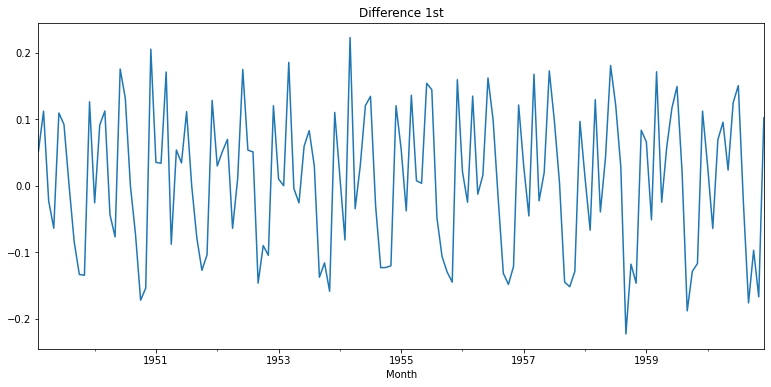

In [34]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


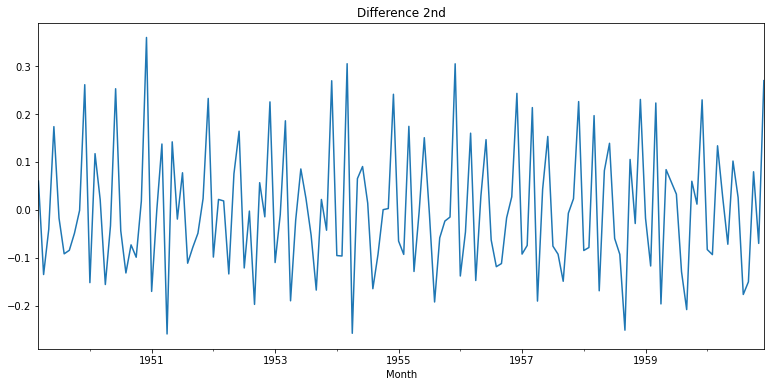

In [35]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### 학습 데이터 분리

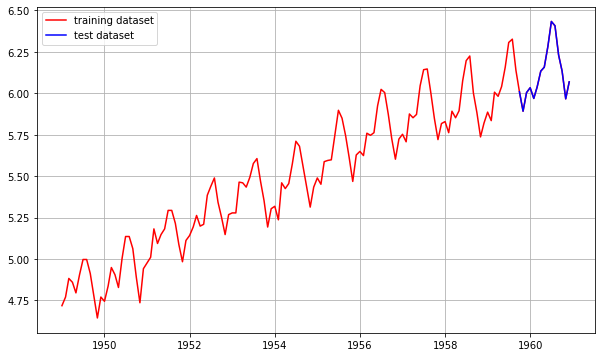

In [36]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [37]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


### ARIMA 모델 훈련

In [38]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.942
Date:                Mon, 08 Aug 2022   AIC                           -409.883
Time:                        02:01:39   BIC                           -367.103
Sample:                    01-01-1949   HQIC                          -392.502
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2651      0.081     -3.277      0.001      -0.424      -0.107
ar.L2         -0.0044      0.108     -0.040      0.968      -0.216       0.208
ar.L3          0.0021      0.046      0.046      0.9

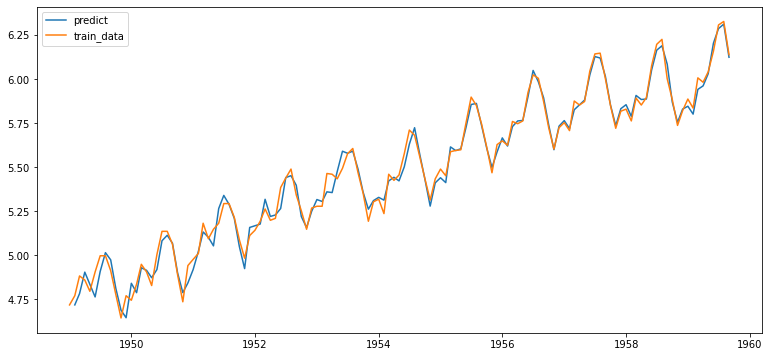

In [39]:
# 훈련 결과 시각화
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

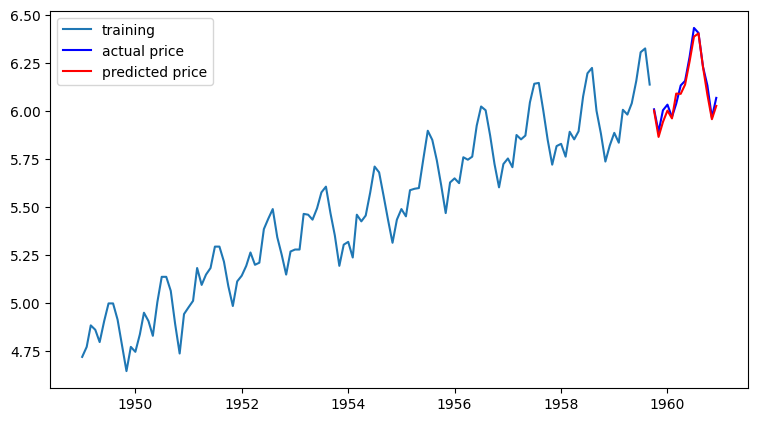

In [40]:
# forecast()메소드를 이용해 테스트 데이터 구간의 데이터를 예측

model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  236.27939252509398
MAE:  12.55810531713422
RMSE:  15.371382258115045
MAPE: 2.76%


# 본격 프로젝트


## 샘플 프로젝트

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

In [89]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [90]:
# 로그 변환 시도 
ts_log = np.log(ts)

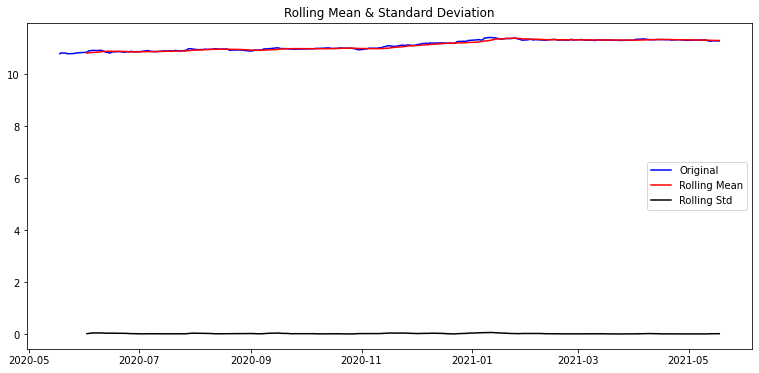

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


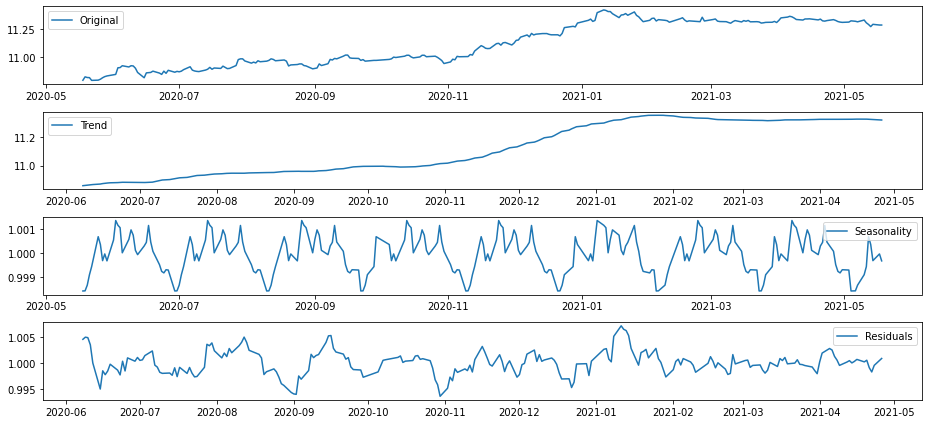

In [91]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [92]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


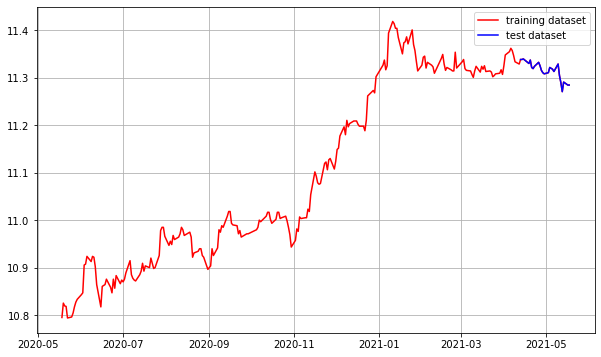

In [93]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

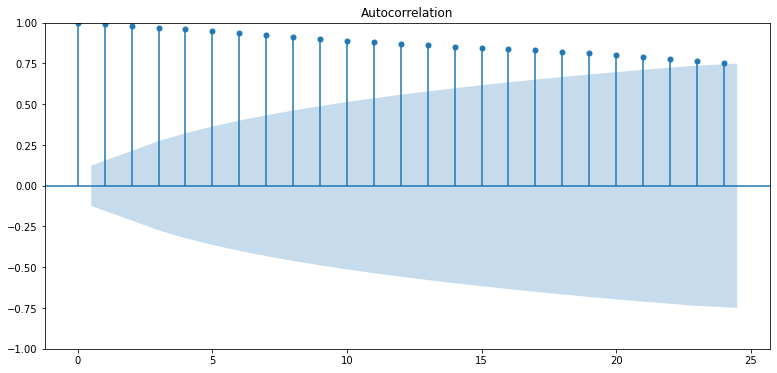

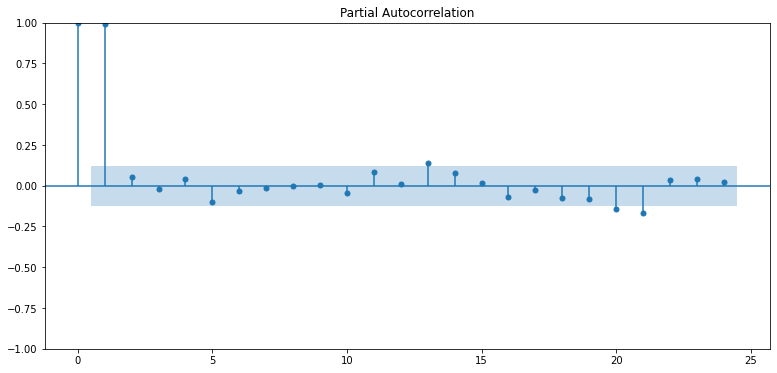

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


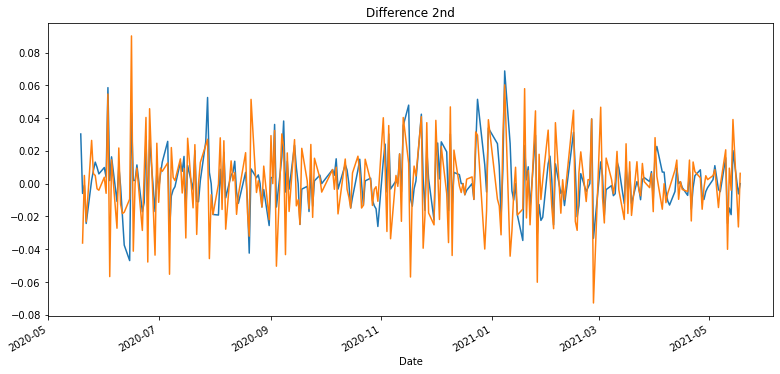

In [95]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [107]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 583.409
Date:                Mon, 08 Aug 2022   AIC                          -1158.817
Time:                        02:06:04   BIC                          -1145.153
Sample:                             0   HQIC                         -1153.302
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.132     83.895      0.000      10.831      11.349
ar.L1          1.0296      0.061     16.764      0.000       0.909       1.150
ar.L2         -0.0350      0.062     -0.562      0.5

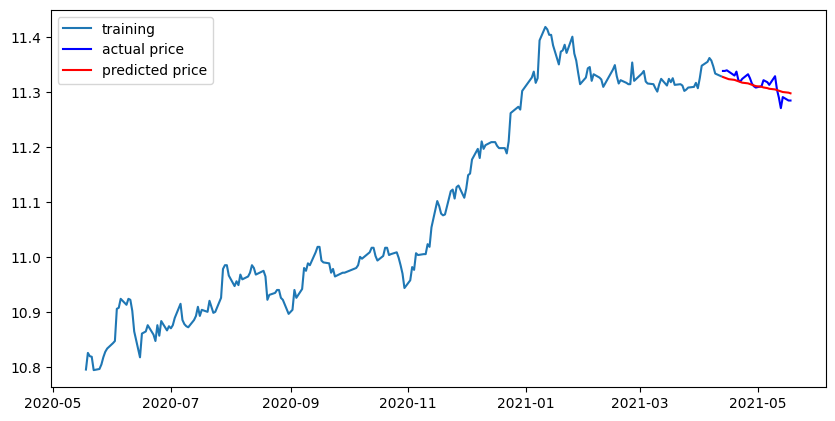

In [108]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1052831.3953688445
MAE:  840.325291750654
RMSE:  1026.0757259427028
MAPE: 1.02%


---

# 1. 애플


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [111]:
# 데이터 불러오기
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts_Apple = df['Close']

ts_Apple.head()


Date
2021-07-29    145.639999
2021-07-30    145.860001
2021-08-02    145.520004
2021-08-03    147.360001
2021-08-04    146.949997
Name: Close, dtype: float64

In [112]:
# 결측치 처리
ts_Apple = ts_Apple.interpolate(method='time')
ts_Apple[ts_Apple.isna()]

Series([], Name: Close, dtype: float64)

In [113]:
# 로그 변환 
ts_Apple_log = np.log(ts_Apple)

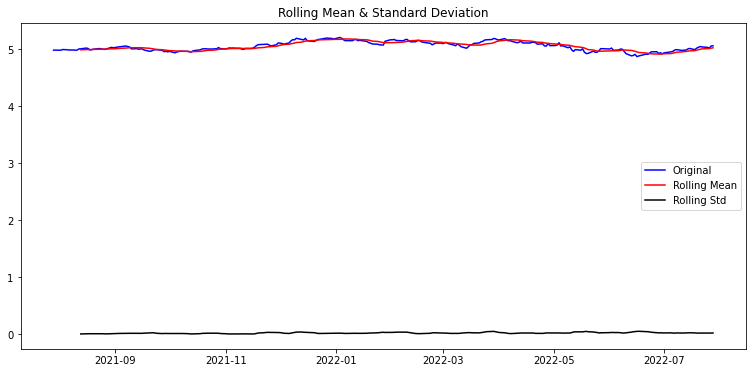

Results of Dickey-Fuller Test:
Test Statistic                  -1.988547
p-value                          0.291617
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


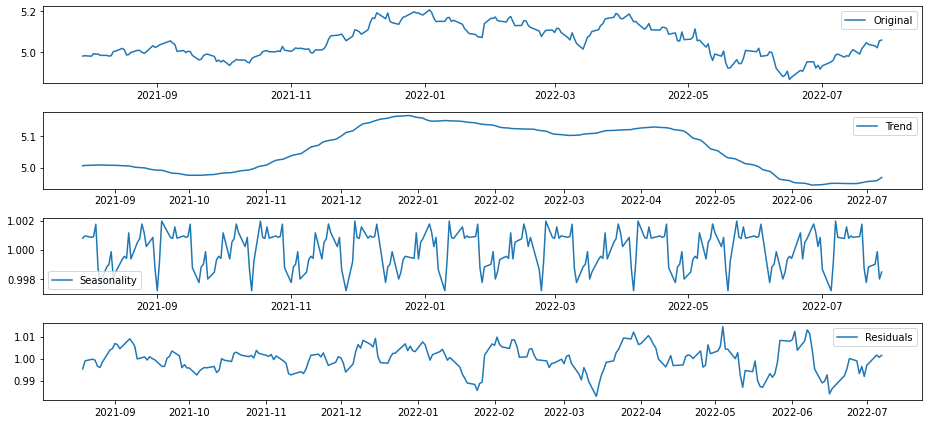

In [114]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_Apple_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_Apple_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_Apple_log, model='multiplicative', period = 30) 

trend_Apple = decomposition.trend
seasonal_Apple = decomposition.seasonal
residual_Apple = decomposition.resid

plt.subplot(411)
plt.plot(ts_Apple_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_Apple, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_Apple,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_Apple, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [115]:
# Residual 안정성 확인
residual_Apple.dropna(inplace=True)
augmented_dickey_fuller_test(residual_Apple)

Results of Dickey-Fuller Test:
Test Statistic                  -5.143344
p-value                          0.000011
#Lags Used                      11.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


### 데이터 분리

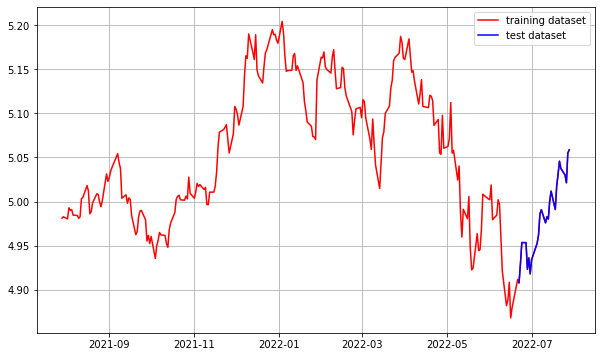

In [116]:
apple_train_data, apple_test_data = ts_Apple_log[:int(len(ts_Apple_log)*0.9)], ts_Apple_log[int(len(ts_Apple_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_Apple_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(apple_test_data, c='b', label='test dataset')
plt.legend()

### 적정 ARIMA 모수 찾기

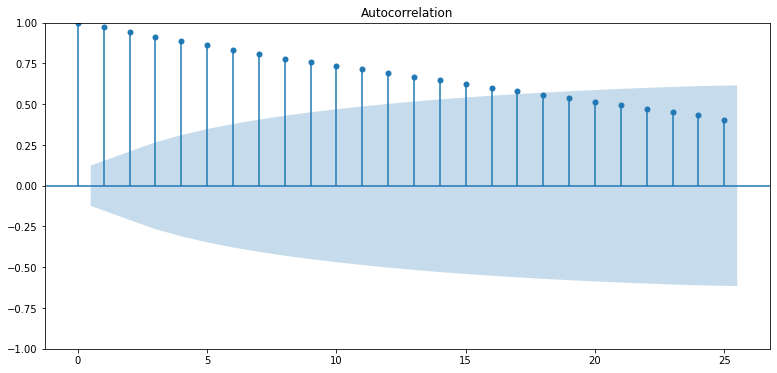

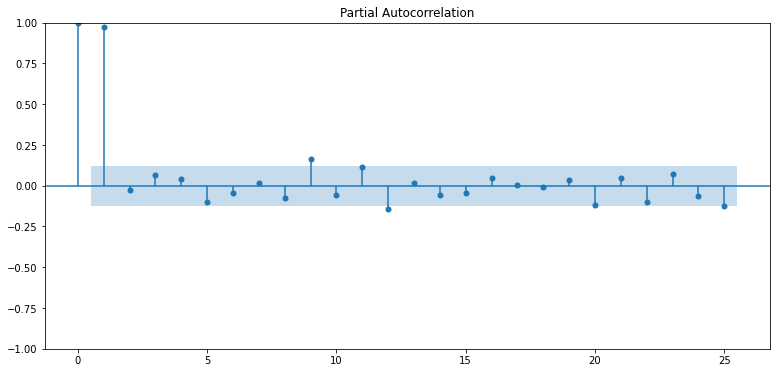

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_Apple_log)  
plot_pacf(ts_Apple_log) 
plt.show()


Results of Dickey-Fuller Test:
Test Statistic                -1.556953e+01
p-value                        1.994888e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.030167e+00
p-value                        1.968079e-12
#Lags Used                     1.100000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


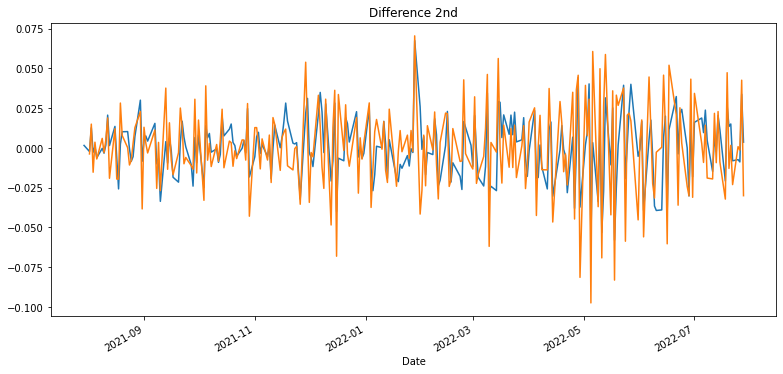

In [118]:
# [ 차분 안정성 확인 ]

# 1차 차분 구하기
diff_1 = ts_Apple_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### ARIMA 모델 훈련과 테스트

In [165]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA(p,d,q)
## p : AR 모형과 관련된 파라미터
## d : 시차(차분 횟수)와 관련된 파라미터
## q :  MA 모형과 관련된 파라미터

# Build Model
model = ARIMA(apple_train_data, order=(2, 0, 40))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                ARIMA(2, 0, 40)   Log Likelihood                 596.345
Date:                Mon, 08 Aug 2022   AIC                          -1104.691
Time:                        02:33:25   BIC                           -954.187
Sample:                             0   HQIC                         -1043.954
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0491      0.030    167.692      0.000       4.990       5.108
ar.L1          0.3830      1.397      0.274      0.784      -2.356       3.122
ar.L2          0.0658      1.192      0.055      0.9

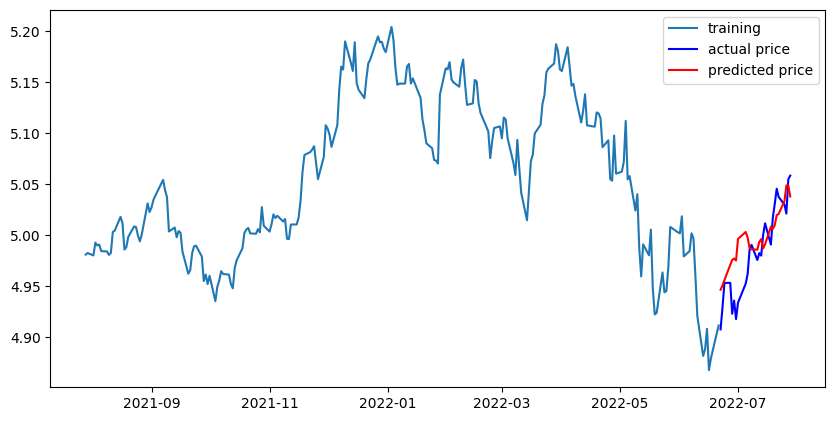

In [166]:
# Forecast : 결과가 fc에 담깁니다. 
fc_apple = fitted_m.forecast(len(apple_test_data), alpha=0.05)  # 95% conf
fc_apple = np.array(fc_apple)

# Make as pandas series
fc_apple_series = pd.Series(fc_apple, index=apple_test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(apple_train_data, label='training')
plt.plot(apple_test_data, c='b', label='actual price')
plt.plot(fc_apple_series, c='r',label='predicted price')
plt.legend()
plt.show()


In [167]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(apple_test_data), np.exp(fc_apple))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(apple_test_data), np.exp(fc_apple))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(apple_test_data), np.exp(fc_apple)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_apple) - np.exp(apple_test_data))/np.abs(np.exp(apple_test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  17.49073404069874
MAE:  3.392015098327624
RMSE:  4.18219249206666
MAPE: 2.37%


---

# 2. 테슬라

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [169]:
# 데이터 불러오기
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/TSLA.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
tsla = df['Close']

tsla.head()

Date
2021-07-29    677.349976
2021-07-30    687.200012
2021-08-02    709.669983
2021-08-03    709.739990
2021-08-04    710.919983
Name: Close, dtype: float64

In [170]:
# 결측치 처리
tsla = tsla.interpolate(method='time')
tsla[tsla.isna()]  


Series([], Name: Close, dtype: float64)

In [171]:
# 로그 변환
tsla_log = np.log(tsla)

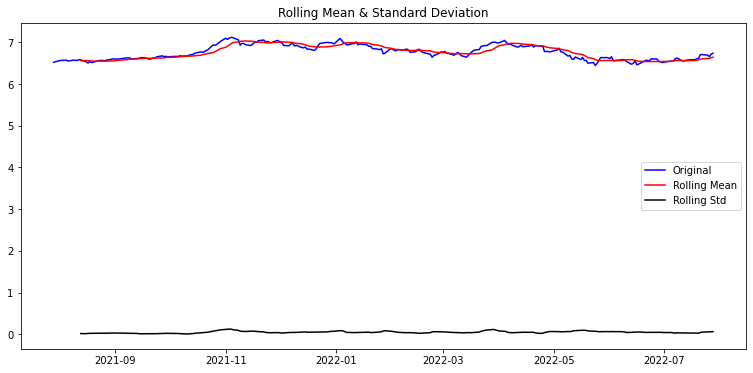

Results of Dickey-Fuller Test:
Test Statistic                  -1.929205
p-value                          0.318449
#Lags Used                      10.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


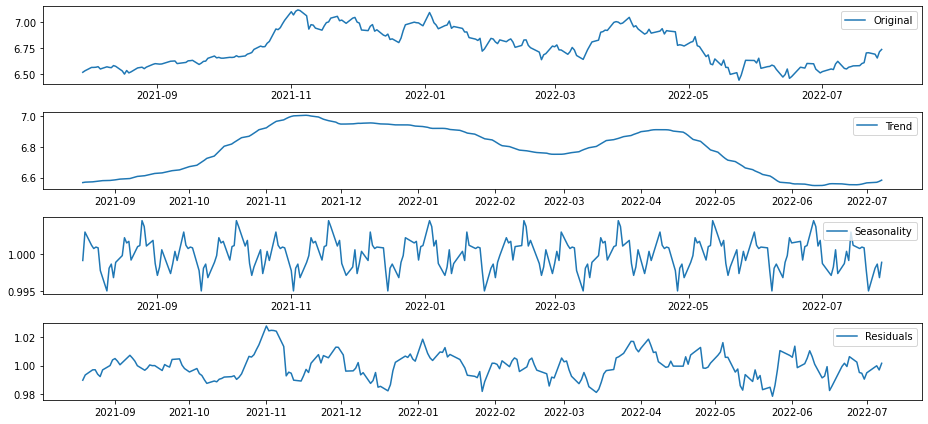

In [173]:
# 정성적 그래프 분석
plot_rolling_statistics(tsla_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(tsla_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tsla_log, model='multiplicative', period = 30) 

trend_tsla = decomposition.trend
seasonal_tsla = decomposition.seasonal
residual_tsla = decomposition.resid

plt.subplot(411)
plt.plot(tsla_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_tsla, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_tsla,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_tsla, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [175]:
# Residual 안정성 확인
residual_tsla.dropna(inplace=True)
augmented_dickey_fuller_test(residual_tsla)

Results of Dickey-Fuller Test:
Test Statistic                  -5.588933
p-value                          0.000001
#Lags Used                       9.000000
Number of Observations Used    212.000000
Critical Value (1%)             -3.461578
Critical Value (5%)             -2.875272
Critical Value (10%)            -2.574089
dtype: float64


### 데이터 분리

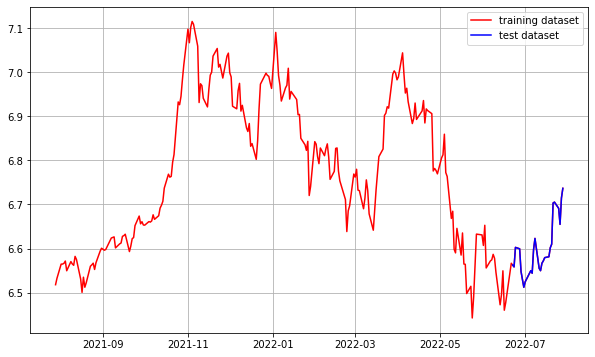

In [176]:
tsla_train_data, tsla_test_data = tsla_log[:int(len(tsla_log)*0.9)], tsla_log[int(len(tsla_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tsla_log, c='r', label='training dataset')  
plt.plot(tsla_test_data, c='b', label='test dataset')
plt.legend()

### 적정 ARIMA 모수 찾기

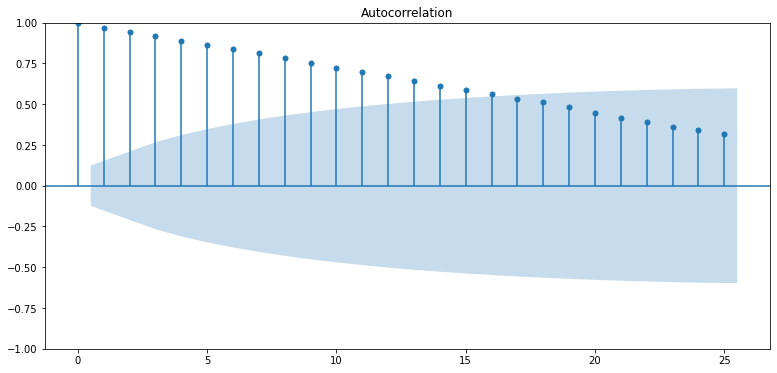

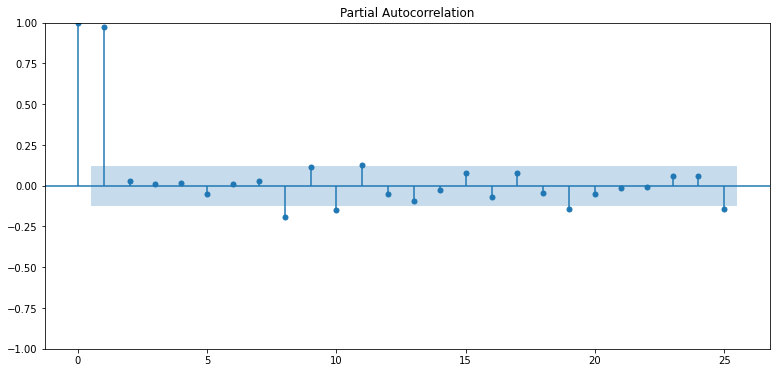

In [177]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(tsla_log)   
plot_pacf(tsla_log)  
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -4.946465
p-value                          0.000028
#Lags Used                       9.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.742491e+00
p-value                        3.093483e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


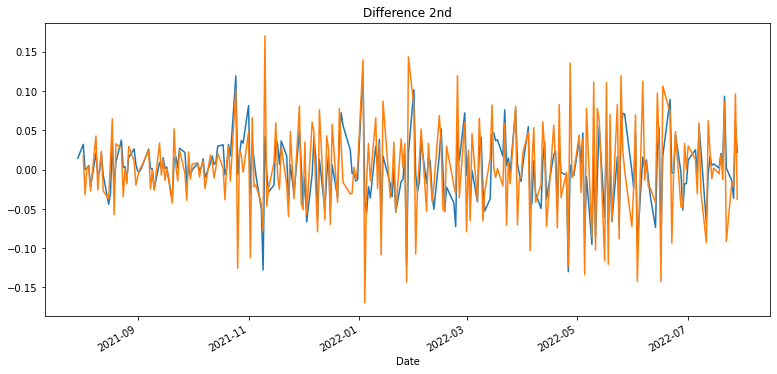

In [178]:
# 1차 차분 구하기
diff_1 = tsla_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### ARIMA 모델 훈련과 테스트

In [203]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model = ARIMA(tsla_train_data, order=(2, 0, 17))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                ARIMA(2, 0, 17)   Log Likelihood                 418.303
Date:                Mon, 08 Aug 2022   AIC                           -794.606
Time:                        02:51:32   BIC                           -722.775
Sample:                             0   HQIC                          -765.618
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7295      0.090     75.007      0.000       6.554       6.905
ar.L1          0.8423      0.572      1.472      0.141      -0.279       1.964
ar.L2          0.1220      0.547      0.223      0.8

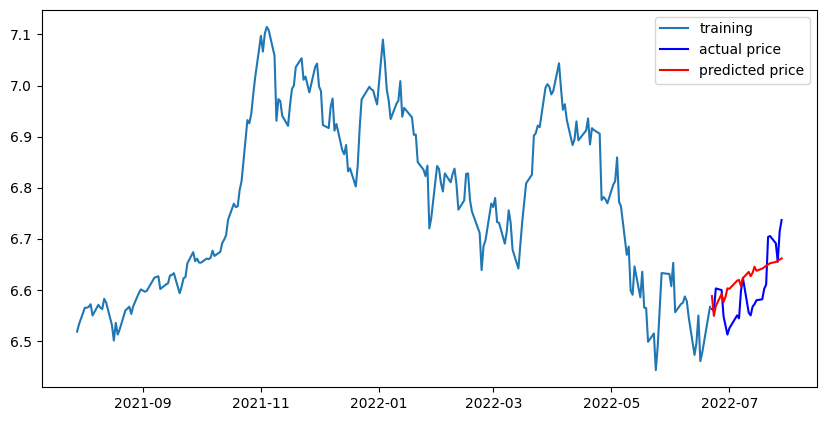

In [204]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(tsla_test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=tsla_test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(tsla_train_data, label='training')
plt.plot(tsla_test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(tsla_test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(tsla_test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(tsla_test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(tsla_test_data))/np.abs(np.exp(tsla_test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1655.1293009526025
MAE:  35.708100276753385
RMSE:  40.68328036125654
MAPE: 4.89%


---

# 3. 현대자동차

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [207]:
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/HYMTF.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts_h = df['Close']

ts_h.head()

Date
2021-07-29    47.250000
2021-07-30    46.689999
2021-08-02    46.860001
2021-08-03    46.860001
2021-08-04    46.990002
Name: Close, dtype: float64

In [208]:
# 결측치 처리
ts_h = ts_h.interpolate(method='time')
ts_h[ts_h.isna()]  

Series([], Name: Close, dtype: float64)

In [209]:
# 로그 변환
tsh_log = np.log(ts_h)

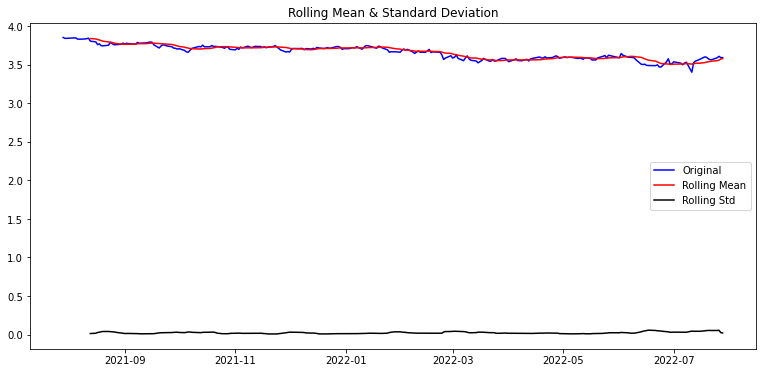

Results of Dickey-Fuller Test:
Test Statistic                  -1.985417
p-value                          0.293004
#Lags Used                       7.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


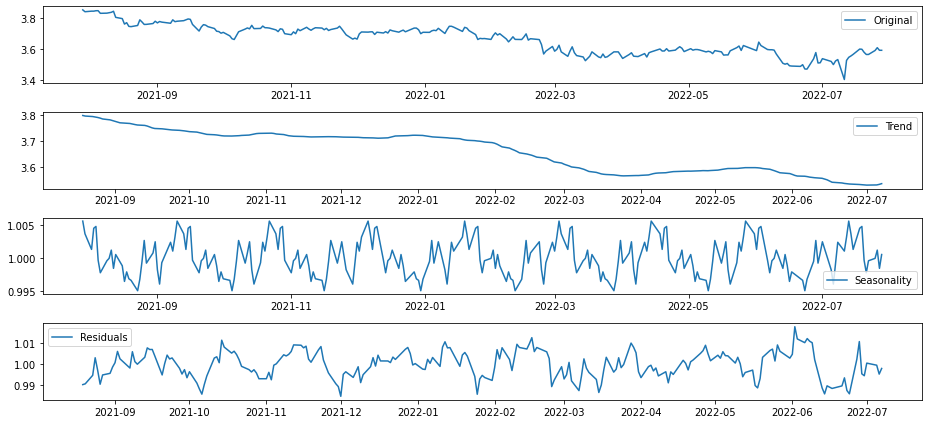

In [210]:
# 정성적 그래프 분석
plot_rolling_statistics(tsh_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(tsh_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tsh_log, model='multiplicative', period = 30) 

trend_h = decomposition.trend
seasonal_h = decomposition.seasonal
residual_h = decomposition.resid

plt.subplot(411)
plt.plot(tsh_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_h, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_h,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_h, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [211]:
# Residual 안정성 확인
residual_h.dropna(inplace=True)
augmented_dickey_fuller_test(residual_h)

Results of Dickey-Fuller Test:
Test Statistic                -6.584688e+00
p-value                        7.364915e-09
#Lags Used                     7.000000e+00
Number of Observations Used    2.140000e+02
Critical Value (1%)           -3.461282e+00
Critical Value (5%)           -2.875143e+00
Critical Value (10%)          -2.574020e+00
dtype: float64


### 데이터 분리

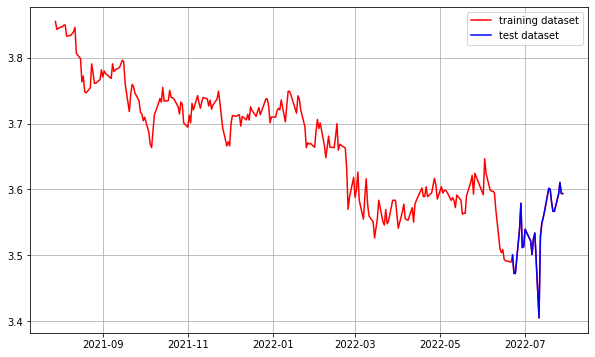

In [212]:
h_train_data, h_test_data = tsh_log[:int(len(tsh_log)*0.9)], tsh_log[int(len(tsh_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(tsh_log, c='r', label='training dataset')
plt.plot(h_test_data, c='b', label='test dataset')
plt.legend()

### 적정 ARIMA 모수 찾기

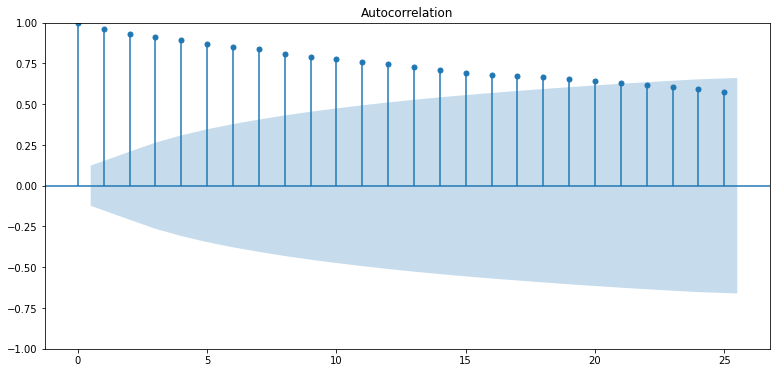

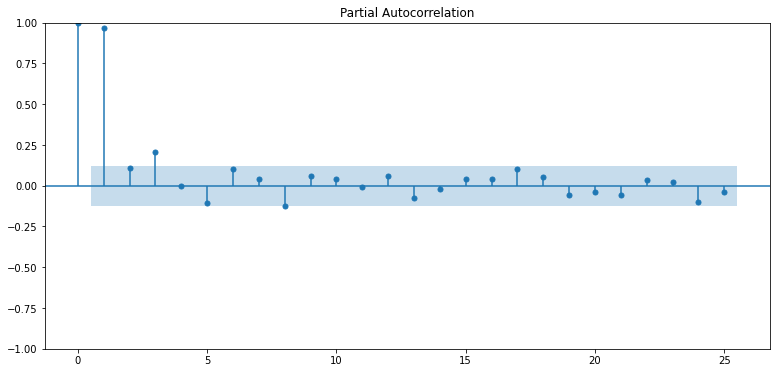

In [213]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(tsh_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(tsh_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

In [247]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(h_train_data, order=(2, 0, 2))  
fitted_m = model.fit() 

print(fitted_m.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 582.700
Date:                Mon, 08 Aug 2022   AIC                          -1153.400
Time:                        02:59:53   BIC                          -1132.877
Sample:                             0   HQIC                         -1145.118
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6776      0.061     60.320      0.000       3.558       3.797
ar.L1          0.8909      0.416      2.144      0.032       0.076       1.705
ar.L2          0.0970      0.407      0.238      0.8

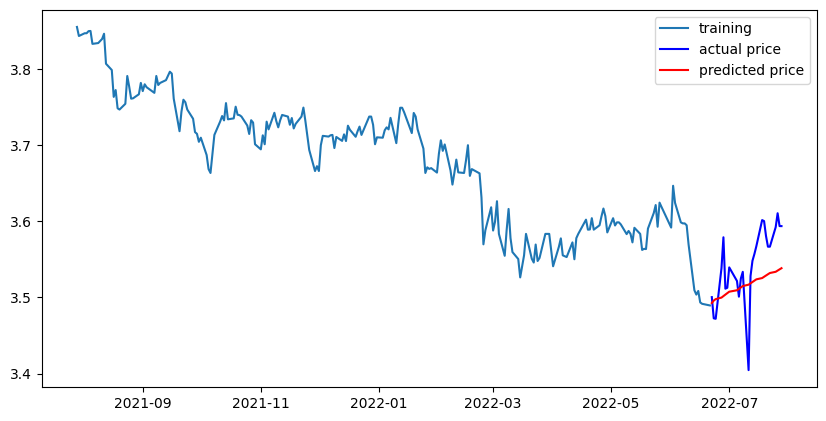

In [248]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(h_test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=h_test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(h_train_data, label='training')
plt.plot(h_test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [249]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(h_test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(h_test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(h_test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(h_test_data))/np.abs(np.exp(h_test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  2.6702565616850085
MAE:  1.3475030677230306
RMSE:  1.6340919685516506
MAPE: 3.86%


# 회고

* 1. 애플
> 1) Decomposing을 통해 얻어진 Residual은 낮은 ** p-value ** 을 보여주므로 확실히 예측 가능한 수준의 안정적인 시계열이라고 판단
> 2) ARIMA(2, 0, 40) 설정
>> * ACF 그래프상에서 q 파라미터를 결정짓는 요소로 애플 주식의 시차 q =2 이후로 0에 가까워지는 현상이 있으므로 적합한 q의 값은 2이상으로 해주면 된다
>> * 그래프 상으로 점차 감소하는 형태이므로 0에 가까워지는 파라미터 값을 임의적으로 높게 설정함 
>> * PACE 그래프는 p가 2이상인 구간에서 PACG는 거의 0에 가까워지고 있기때문에  p=2로 설정
>> * d는 차분의 횟수로 원래 데이터가 stable하기 때문에 0으로 설정


* 2. 테슬라
> 1) Decomposing을 통해 얻어진 Residual은 낮은 ** p-value ** 을 보여주므로 확실히 예측 가능한 수준의 안정적인 시계열이라고 판단
> 2) ARIMA(2, 0, 17) 설정
>> * ACF 그래프상에서 q 파라미터를 결정짓는 요소로 애플 주식의 시차 q =2 이후로 0에 가까워지는 현상이 있으므로 적합한 q의 값은 2이상으로 설정하면 됨
>> * 그래프 상 영역에 들어가는 직전 값으로 설정함
>> * PACE 그래프는 p가 2이상인 구간에서 PACG는 거의 0에 가까워지고 있기때문에  p=2로 설정
>> * d는 차분의 횟수로 원래 데이터가 stable하기 때문에 0으로 설정


* 3. 현대자동차 
> 1) Decomposing을 통해 얻어진 Residual은 낮은 ** p-value ** 을 보여주므로 확실히 예측 가능한 수준의 안정적인 시계열이라고 판단
> 2) ARIMA(2, 0, 2) 설정
>> * ACF 그래프상에서 q 파라미터를 결정짓는 요소로 애플 주식의 시차 q =2 이후로 0에 가까워지는 현상이 있으므로 적합한 q의 값은 2이상으로 설정하면 됨
>> * PACE 그래프는 p가 2이상인 구간에서 PACG는 거의 0에 가까워지고 있기때문에  p=2로 설정
>> * d는 차분의 횟수로 원래 데이터가 stable하기 때문에 0으로 설정

* 전반적으로 값과 그래프 확인을 통해 파라미터를 초기 설정해주었지만, 파라미터 설정 시 값들의 관계가 정확히 성립되지 않아 수동적 여러 조합으로 파라미터 값을 설정해주었고, p,d,q의 정확한 관계 정립이 필요함을 느낍니다 

* 실제 갖고 있는 주식 종목의 실제 데이터를 사용하여 예측해본 그래프이므로 이후 프로젝트 이후, 실제 주식 차트와 비교하여 예측의 정확도를 비교해보는 시간을 갖는 것도 고려해볼 예정이다.